In [127]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [128]:
sortie = pd.read_csv("kc_house_data.csv", sep=",");
sortie.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [129]:
LesValeurNull= sortie.isnull().sum()
print("Les champs avec le nombre de valeurs null")
LesValeurNull

Les champs avec le nombre de valeurs null


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [130]:
print("les caracteristique les plus important sont : price , bedrooms , bathrooms , floor")

les caracteristique les plus important sont : price , bedrooms , bathrooms , floor


In [131]:
#suppression des caractéres 
nouveauSortie = sortie.drop(["sqft_lot15" , 
                      "sqft_living15" ,
                       "long" ,
                      "lat" ,
                      "zipcode" ,
                      "yr_renovated" ,
                      "yr_built" ,
                      "sqft_basement" ,
                      "sqft_above" ,
                      "grade" ,
                      "condition" ,
                      "view" ,
                      "waterfront",
                      "sqft_living" ,
                      "id",
                             "date"
                     ],axis=1).round();
nouveauSortie.head(3)

,price,bedrooms,bathrooms,sqft_lot,floors
0,221900.0,3,1.0,5650,1.0
1,538000.0,3,2.0,7242,2.0
2,180000.0,2,1.0,10000,1.0


In [132]:
x=nouveauSortie[["sqft_lot"]]  
y=nouveauSortie["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
print("shape of original dataset :", nouveauSortie.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (21613, 5)
shape of input - training set (14048, 1)
shape of output - training set (14048,)
shape of input - testing set (7565, 1)
shape of output - testing set (7565,)


In [133]:
# Apply Linear regression to your training set. 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)


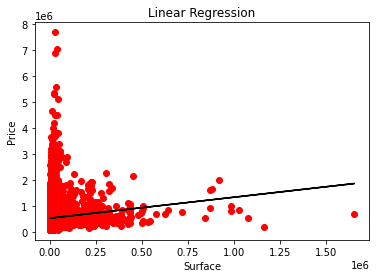

In [134]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Surface")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [135]:
print("MSE : " , mean_squared_error(y_test , prediction))
print("R squared : " , metrics.r2_score(y_test , prediction))
print("Coef : " , model.coef_)

MSE :  124884129192.88837
R squared :  0.006629158583476458
Coef :  [0.80874852]


In [136]:
import numpy as np
df = sortie
df["price"] = [np.log10(df["price"][i]) for i in range(len(df["price"]))]
df["sqft_lot"] = [np.log10(df["sqft_lot"][i]) for i in range(len(df["sqft_lot"]))]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,5.346157,3,1.00,1180,3.752048,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,5.730782,3,2.25,2570,3.859859,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,5.255273,2,1.00,770,4.000000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,5.781037,4,3.00,1960,3.698970,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,5.707570,3,2.00,1680,3.907411,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [137]:
x1=df[["sqft_lot","condition"]]  
y1=df['price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=40)

In [138]:
model1=LinearRegression() 
model1.fit(x1_train,y1_train) 
predicted=model1.predict(x1_test)

In [139]:
print("MSE score : ", mean_squared_error(y1_test,predicted))
print("\nR squared score : ", metrics.r2_score(y1_test,predicted))

MSE score :  0.05065976382790818

R squared score :  0.021303183758157096


In [140]:
print("MSE score : ", mean_squared_error(y_test,predicted))
print("\nR squared score : ", metrics.r2_score(y_test,predicted))

MSE score :  416791284612.7311

R squared score :  -2.315299644291387


In [141]:
print("Multiple linear regression est meilleur que linear regression")

Multiple linear regression est meilleur que linear regression


In [142]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

x1=df[["sqft_lot","condition"]]  
y1=df['price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=40)

model2=LinearRegression() 
model2.fit(x1_train,y1_train) 
predicted=model1.predict(x1_test) 

poly=PolynomialFeatures(degree=3)

x1_train_fit = poly.fit_transform(x1_train) 
model2.fit(x1_train_fit, y1_train)
x_test_ = poly.fit_transform(x1_test)
predicted = model2.predict(x_test_)

In [143]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  416791282338.77014
R squared:  -2.315299626203528


In [144]:
   
print(" la meilleur solution pour la prediction est le polynomial regression  a cause de MSE score ")

 la meilleur solution pour la prediction est le polynomial regression  a cause de MSE score 
